In [2]:
import pickle
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
!pip install emoji
!pip install vaderSentiment
from emoji import UNICODE_EMOJI
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install TextBlob
from textblob import TextBlob
from textblob import Word

In [7]:

df_comments = pd.read_csv('C:/Users/madha/Downloads/SentimentAnalysisYTComments/yt_comments.csv')

In [12]:
df_comments.head(3)

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,total_reply_counts,just_date
0,0,54:50 Did you use the word smart?\nI Am DYIN,UgxX3UX6UcLf1ak02uN4AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:56:33+00:00,0,2020-12-06
1,1,44:41 It is mental LMFAO . Wow a new height ...,Ugyr8s3gRCpggbQ0wL14AaABAg,http://www.youtube.com/channel/UCC6FwHvoZHvllE...,Rhombohedral,0,0,2020-12-06 21:38:37+00:00,0,2020-12-06
2,2,I wanted Lawrence O'Donnell as the moderator.,UgwHMPxYWzmWJfbJBQx4AaABAg,http://www.youtube.com/channel/UCZKnDfKsZetqUn...,XedoctopusTheVyonder,0,0,2020-12-06 21:36:07+00:00,0,2020-12-06


In [14]:
# https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d
# https://github.com/rohithramesh1991/Text-Preprocessing/blob/master/Text%20Preprocessing_codes.py
# https://stackoverflow.com/questions/51217909/removing-all-emojis-from-text 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [15]:
# text preprocessing
"""removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
import string
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

# remove emojis 
def give_emoji_free_text(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text


def text_process(text):
    # stemmer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    # temp = [stemmer.lemmatize(word) for word in nopunc]
    temp = [stemmer.stem(word) for word in nopunc]

    joined = ' '.join(temp)
    # remove emojis 
    joined = give_emoji_free_text(joined)

    # correct spelling 
    # joined = str(TextBlob(joined).correct())

    return joined.split()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
##kmeans
desc = df_comments['comment'].values 
vectorizer4 = TfidfVectorizer(analyzer = text_process, stop_words=stopwords.words('english'), ngram_range=(1,3))
X4 = vectorizer4.fit_transform(desc)
words = vectorizer4.get_feature_names()


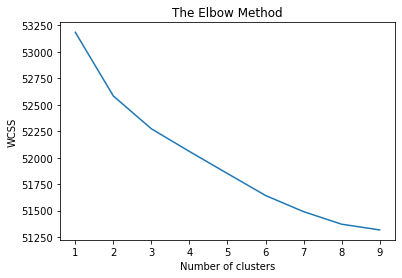

In [17]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 2, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X4)
# We look at 2 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))
    

C:\Users\madha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0 : trump, fuck, go, vote, biden, presid, debat, like, one, moder, joe, savag, get, behav, peopl, beauti, piec, i, weak, bless, support, babi, heard, love, anoth
1 : trump, biden, i, debat, joe, like, presid, thi, the, moder, vote, peopl, watch, fuck, talk, wallac, he, get, one, say, time, go, america, lol, chri
